In [6]:
import os
import librosa
import numpy as np
from keras.models import load_model
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

train_audio_path = '../data/'
labels=["yes", "no", "up", "down", "left"]  # First set
# labels=["stop", "three", "two", "wow", "zero"]  # Second set

all_wave = []
all_label = []
for label in labels:
    print(label)
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        samples, sample_rate = librosa.load(train_audio_path + '/' + label + '/' + wav, sr = 16000)
        samples = librosa.resample(samples, sample_rate, 8000)
        if(len(samples)== 8000) : 
            all_wave.append(samples)
            all_label.append(label)

stop
three
two
wow
zero


In [8]:
le = LabelEncoder()
y=le.fit_transform(all_label)
classes= list(le.classes_)

y=np_utils.to_categorical(y, num_classes=len(labels))
all_wave = np.array(all_wave).reshape(-1,8000,1)

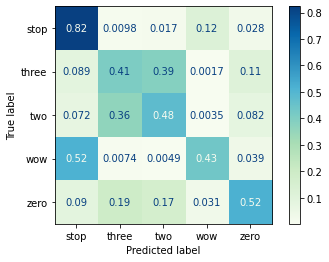

              precision    recall  f1-score   support

           0       0.57      0.82      0.68      1739
           1       0.42      0.41      0.41      1715
           2       0.45      0.48      0.46      1712
           3       0.66      0.43      0.52      1220
           4       0.68      0.52      0.59      1762

    accuracy                           0.54      8148
   macro avg       0.56      0.53      0.53      8148
weighted avg       0.55      0.54      0.53      8148



In [9]:
model = load_model('best_model_20_2ndSet.hdf5')

x_train, x_test, y_train, y_test = train_test_split(np.array(all_wave),np.array(y),stratify=y,
                                            test_size = 0.8,random_state=777,shuffle=True)
y_pred = model.predict(x_test)

matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), normalize='true')
report = classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1))

disp = ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=labels)
disp = disp.plot(include_values=True, cmap='GnBu', ax=None, xticks_rotation='horizontal')

plt.show()
print(report)

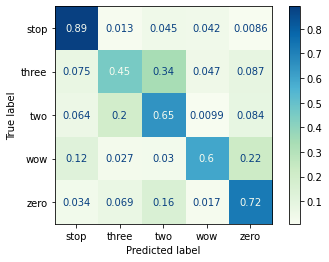

              precision    recall  f1-score   support

           0       0.78      0.89      0.83      1739
           1       0.60      0.45      0.52      1715
           2       0.53      0.65      0.58      1712
           3       0.78      0.60      0.68      1220
           4       0.69      0.72      0.71      1762

    accuracy                           0.67      8148
   macro avg       0.68      0.66      0.66      8148
weighted avg       0.67      0.67      0.66      8148



In [11]:
model = load_model('tl_best_model_20.hdf5')

x_train, x_test, y_train, y_test = train_test_split(np.array(all_wave),np.array(y),stratify=y,
                                            test_size = 0.8,random_state=777,shuffle=True)
y_pred = model.predict(x_test)

matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), normalize='true')
report = classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1))

disp = ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=labels)
disp = disp.plot(include_values=True, cmap='GnBu', ax=None, xticks_rotation='horizontal')

plt.show()
print(report)

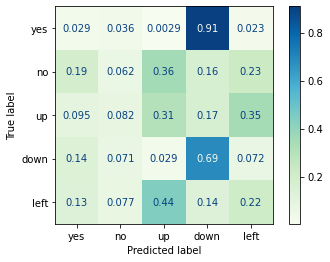

              precision    recall  f1-score   support

           0       0.05      0.03      0.04      1739
           1       0.20      0.06      0.10      1715
           2       0.27      0.31      0.29      1712
           3       0.26      0.69      0.38      1220
           4       0.25      0.22      0.23      1762

    accuracy                           0.23      8148
   macro avg       0.21      0.26      0.21      8148
weighted avg       0.20      0.23      0.20      8148



In [16]:
labels=["yes", "no", "up", "down", "left"]  # First set
model = load_model('best_model_20.hdf5')

x_train, x_test, y_train, y_test = train_test_split(np.array(all_wave),np.array(y),stratify=y,
                                            test_size = 0.8,random_state=777,shuffle=True)
y_pred = model.predict(x_test)

matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), normalize='true')
report = classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1))

disp = ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=labels)
disp = disp.plot(include_values=True, cmap='GnBu', ax=None, xticks_rotation='horizontal')

plt.show()
print(report)

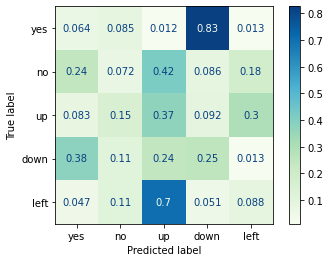

              precision    recall  f1-score   support

           0       0.09      0.06      0.08      1304
           1       0.14      0.07      0.10      1286
           2       0.22      0.37      0.28      1284
           3       0.14      0.25      0.18       915
           4       0.15      0.09      0.11      1322

    accuracy                           0.16      6111
   macro avg       0.15      0.17      0.15      6111
weighted avg       0.15      0.16      0.15      6111



In [17]:
model = load_model('best_model_40.hdf5')

x_train, x_test, y_train, y_test = train_test_split(np.array(all_wave),np.array(y),stratify=y,
                                            test_size = 0.6,random_state=777,shuffle=True)
y_pred = model.predict(x_test)

matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), normalize='true')
report = classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1))

disp = ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=labels)
disp = disp.plot(include_values=True, cmap='GnBu', ax=None, xticks_rotation='horizontal')

plt.show()
print(report)

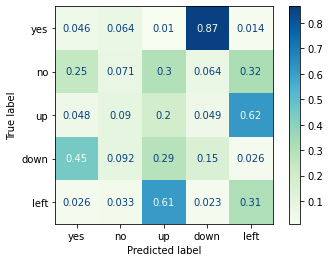

              precision    recall  f1-score   support

           0       0.07      0.05      0.05       870
           1       0.22      0.07      0.11       857
           2       0.15      0.20      0.17       856
           3       0.09      0.15      0.11       610
           4       0.25      0.31      0.28       881

    accuracy                           0.15      4074
   macro avg       0.15      0.15      0.14      4074
weighted avg       0.16      0.15      0.15      4074



In [18]:
model = load_model('best_model_60.hdf5')

x_train, x_test, y_train, y_test = train_test_split(np.array(all_wave),np.array(y),stratify=y,
                                            test_size = 0.4,random_state=777,shuffle=True)
y_pred = model.predict(x_test)

matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), normalize='true')
report = classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1))

disp = ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=labels)
disp = disp.plot(include_values=True, cmap='GnBu', ax=None, xticks_rotation='horizontal')

plt.show()
print(report)

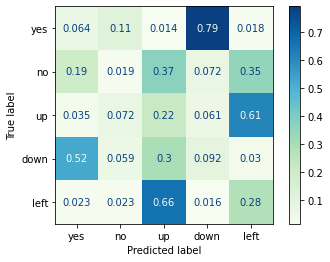

              precision    recall  f1-score   support

           0       0.10      0.06      0.08       435
           1       0.07      0.02      0.03       429
           2       0.15      0.22      0.18       428
           3       0.06      0.09      0.08       305
           4       0.22      0.28      0.25       440

    accuracy                           0.14      2037
   macro avg       0.12      0.13      0.12      2037
weighted avg       0.12      0.14      0.12      2037



In [19]:
model = load_model('best_model_80.hdf5')

x_train, x_test, y_train, y_test = train_test_split(np.array(all_wave),np.array(y),stratify=y,
                                            test_size = 0.2,random_state=777,shuffle=True)
y_pred = model.predict(x_test)

matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1), normalize='true')
report = classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1))

disp = ConfusionMatrixDisplay(confusion_matrix=matrix,display_labels=labels)
disp = disp.plot(include_values=True, cmap='GnBu', ax=None, xticks_rotation='horizontal')

plt.show()
print(report)